# Importing tools

In [150]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [151]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind 

In [ ]:
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data

In [152]:
RW_df = pd.read_csv('winequality-red.csv', delimiter = ';')

In [153]:
RW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [154]:
RW_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [155]:
RW_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

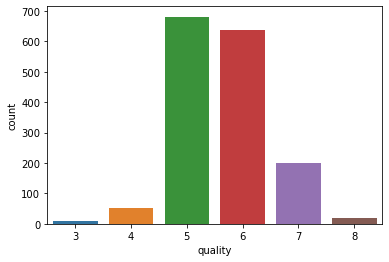

In [156]:
sb.countplot(x = "quality", data = RW_df)

In [157]:
RW_df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [158]:
# categorizing quality type according to the quality of all the wine samples
RW_df["quality_type"] = RW_df["quality"].apply(lambda x : "Low" if x<=5 else "Medium" if x <= 6 else "High") 

<AxesSubplot:xlabel='quality_type', ylabel='count'>

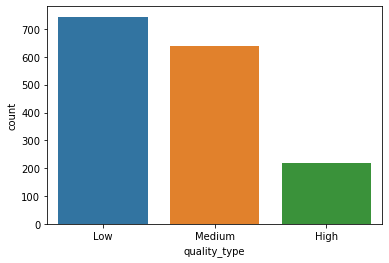

In [159]:
sb.countplot(x = "quality_type", data = RW_df)

In [160]:
RW_df["quality_type"].value_counts()

Low       744
Medium    638
High      217
Name: quality_type, dtype: int64

In [161]:
RW_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Low


## Correlation Matrix

In [162]:
corr = RW_df.corr()

<AxesSubplot:>

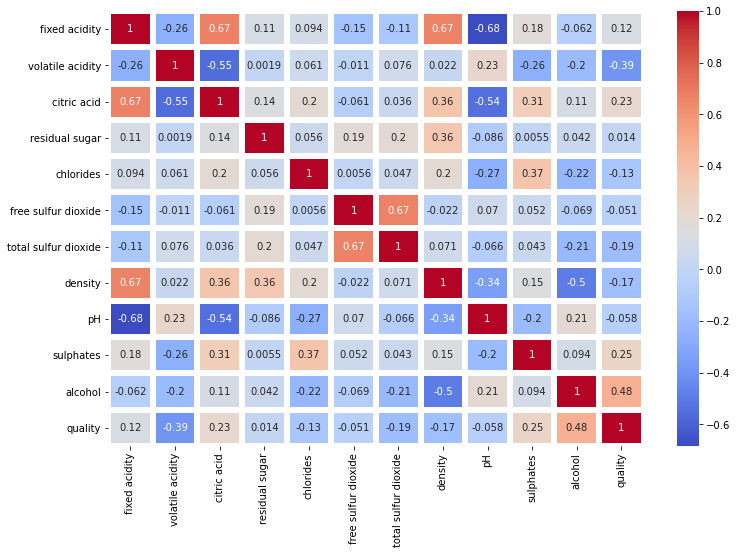

In [163]:
plt.figure(figsize = (12,8))
sb.heatmap(corr, linewidth = 5, cmap = "coolwarm", annot = True)

In [164]:
#sb.pairplot(RW_df, hue ="quality_type")

## alcohol¶

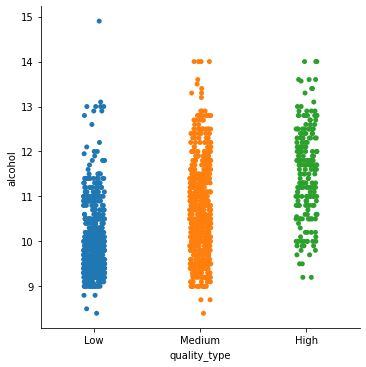

In [165]:
sb.catplot(x = 'quality_type', y = 'alcohol', data = RW_df, order = ["Low", "Medium", "High"])

In [166]:
rw_df_2  = RW_df.groupby('quality').mean()
rw_df_2   [["alcohol"]]

,alcohol
quality,
3,9.955000
4,10.265094
5,9.899706
6,10.629519
7,11.465913
8,12.094444


Text(0.5, 1.0, 'Alcohol Distribution in Different Quality')

<Figure size 864x576 with 0 Axes>

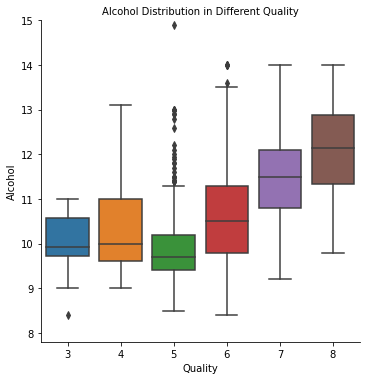

In [167]:
plt.figure(figsize = (12,8))
sb.catplot(x = "quality", y = "alcohol", kind="box", data= RW_df) 
plt.ylabel("Alcohol", size=10)
plt.xlabel("Quality", size=10)
plt.ylim(ymax = 15, ymin = 7.8)
plt.title("Alcohol Distribution in Different Quality", size=10)

Text(0.5, 1.0, 'Alcohol in Different Wine Types')

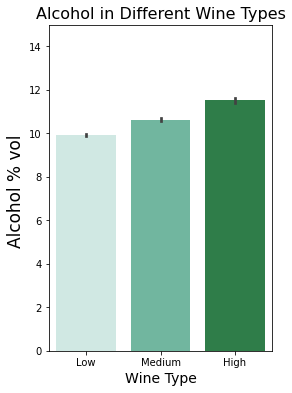

In [168]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "quality_type", y="alcohol", data=RW_df,  palette= ("BuGn"
))
plt.ylabel("Alcohol % vol ", size=17)
plt.xlabel("Wine Type", size=14)
plt.ylim(ymax = 15, ymin = 0)
plt.title("Alcohol in Different Wine Types", size=16)

### statistical tests- one way anova and t-test

In [169]:
data_grp = RW_df.groupby('quality_type')
data_Low = data_grp.get_group("Low")
#data_Low

In [170]:
x = data_Low["alcohol"].values.tolist()
#print (x)

In [171]:
data_grp = RW_df.groupby('quality_type')
data_Medium = data_grp.get_group("Medium")
#data_Medium

In [172]:
y = data_Medium["alcohol"].values.tolist()
#print (y)

In [173]:
data_grp = RW_df.groupby('quality_type')
data_High = data_grp.get_group("High")

In [174]:
z = data_High["alcohol"].values.tolist()

In [175]:
#one-way
stat, pval = f_oneway(x, y, z)
print(pval)

8.009997535938374e-105


In [176]:
#t-test
tstat, pval = ttest_ind(x, y)
pval

6.091453177288231e-44

In [177]:
tstat, pval = ttest_ind(y, z)
pval

5.194000223270016e-26

In [178]:
tstat, pval = ttest_ind(x, z)
pval

5.287412406709402e-108

#### alcohol- density negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


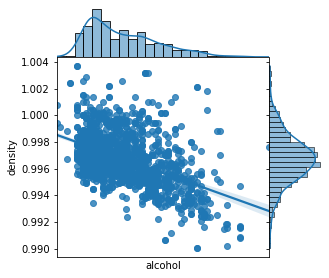

In [179]:
rj = sb.jointplot(x='alcohol', y='density', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)



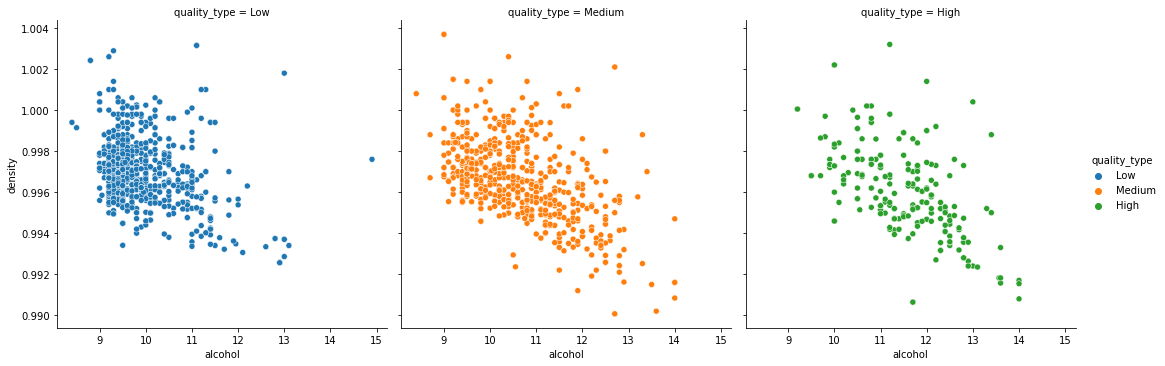

In [180]:
sb.relplot(x = "alcohol", y =  'density', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

#### alcohol- volatile acidity negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


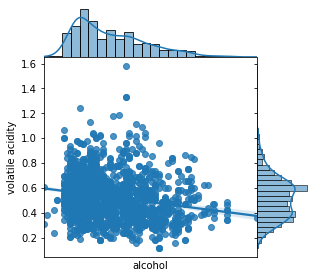

In [181]:
rj = sb.jointplot(x='alcohol', y='volatile acidity', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(1,2)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)



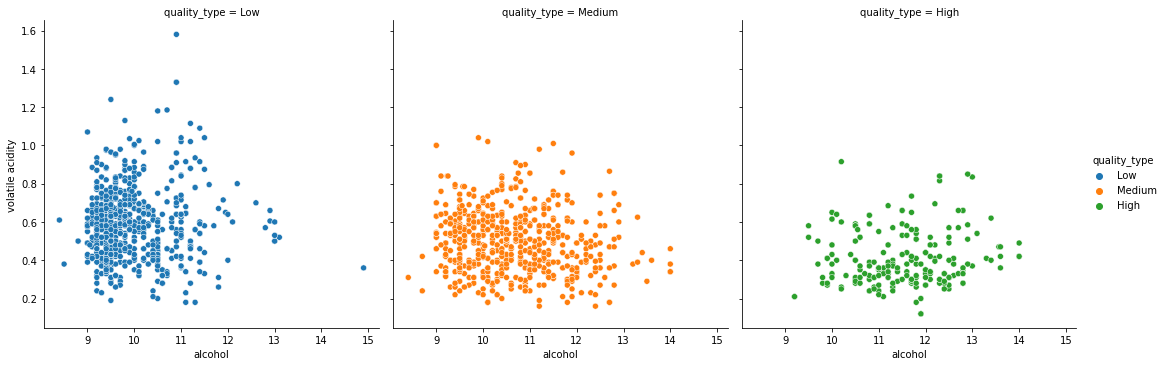

In [182]:
sb.relplot(x = "alcohol", y =  'volatile acidity', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

#### alcohol- citric acid positive correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


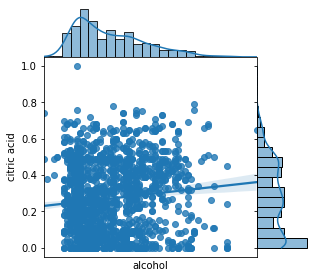

In [183]:
rj = sb.jointplot(x='alcohol', y='citric acid', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(1,2)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

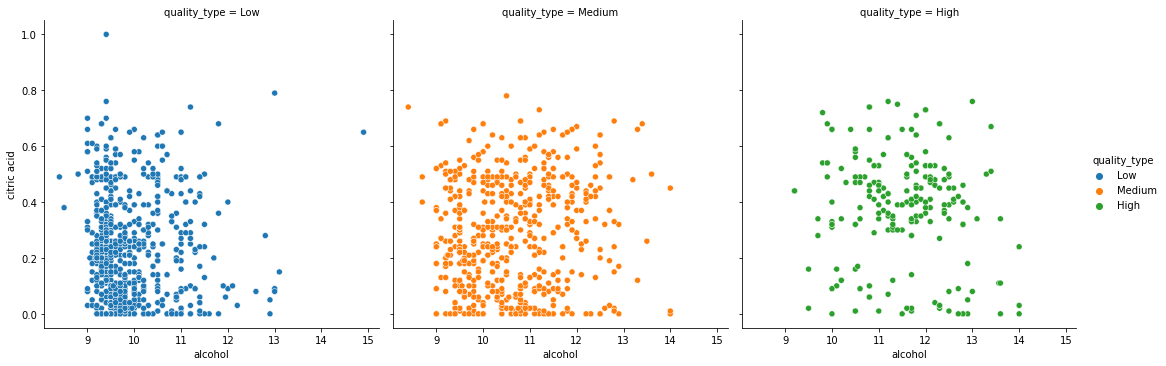

In [184]:
sb.relplot(x = "alcohol", y =  'citric acid', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

## Volatile Acidity

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


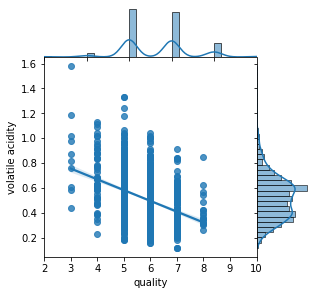

In [185]:
rj = sb.jointplot(x='quality', y='volatile acidity', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(2,11)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

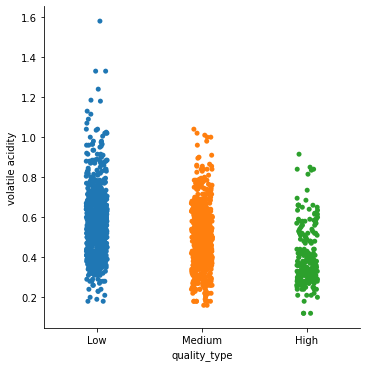

In [186]:

sb.catplot(x = 'quality_type', y = 'volatile acidity', data = RW_df, order = ["Low", "Medium", "High"])


In [187]:
rw_df_2  = RW_df.groupby('quality').mean()
rw_df_2   [["volatile acidity"]]

,volatile acidity
quality,
3,0.884500
4,0.693962
5,0.577041
6,0.497484
7,0.403920
8,0.423333


Text(0.5, 1.0, 'Volatile Acidity Distribution in Different Quality')

<Figure size 864x576 with 0 Axes>

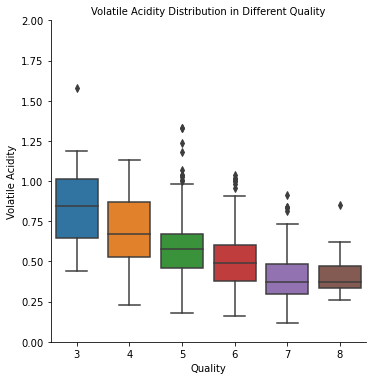

In [188]:
plt.figure(figsize = (12,8))
sb.catplot(x = "quality", y = "volatile acidity", kind="box", data= RW_df) 
plt.ylabel("Volatile Acidity", size=10)
plt.xlabel("Quality", size=10)
plt.ylim(ymax = 2, ymin = 0)
plt.title("Volatile Acidity Distribution in Different Quality", size=10)
#Text(0.5, 1.0, 'Alcohol Distribution in Different Quality')


(0.0, 1.0)

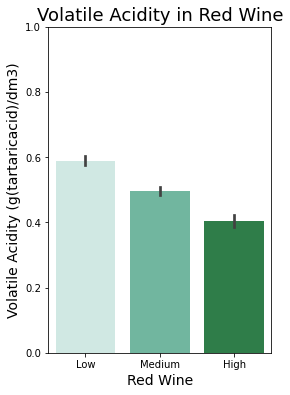

In [189]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "quality_type", y="volatile acidity",data=RW_df, palette = "BuGn")
plt.ylabel("Volatile Acidity (g(tartaricacid)/dm3)", size=14)
plt.xlabel("Red Wine", size=14)
plt.title("Volatile Acidity in Red Wine", size=18)
plt.ylim(ymax = 1, ymin = 0)
#sb.catplot(x="type", y="fixed acidity", kind="point", data=df_wines, hue="quality_type", palette= "Blues")
#plt.savefig("fixed Acidity type.png")  #to save the figure

### statistical tests- one way anova and t-test

In [190]:
x = data_Low["volatile acidity"].values.tolist()
#print (x)

In [191]:
y = data_Medium["volatile acidity"].values.tolist()
#print (y)

In [192]:
z = data_High["volatile acidity"].values.tolist()
#z

In [193]:
from scipy.stats import f_oneway
stat, pval = f_oneway(x, y, z)
print(pval)

5.218173955448215e-49


In [194]:
from scipy.stats import ttest_ind # 2 sample t test
tstat, pval = ttest_ind(x, y)
pval

7.896836339807807e-23

In [195]:
tstat, pval = ttest_ind(x, z)
pval

2.4044299036837297e-40

In [196]:
tstat, pval = ttest_ind(y, z)
pval

2.2900836113520194e-13

#### volatile acidity- citric acid negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


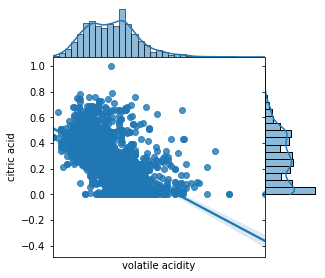

In [197]:
rj = sb.jointplot(x='volatile acidity', y='citric acid', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

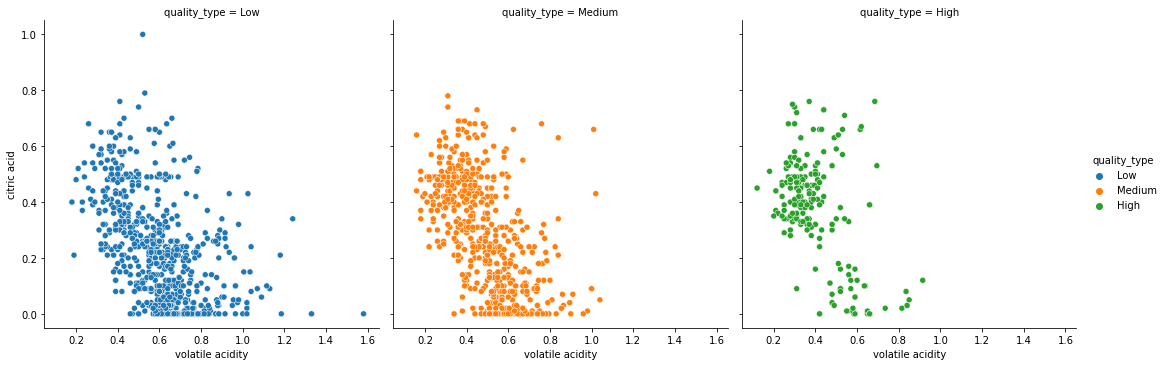

In [198]:
sb.relplot(x = "volatile acidity", y =  'citric acid', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

#### volatile acidity- sulphates negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


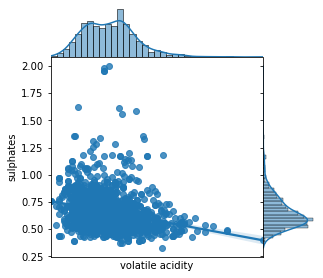

In [199]:
rj = sb.jointplot(x='volatile acidity', y='sulphates', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

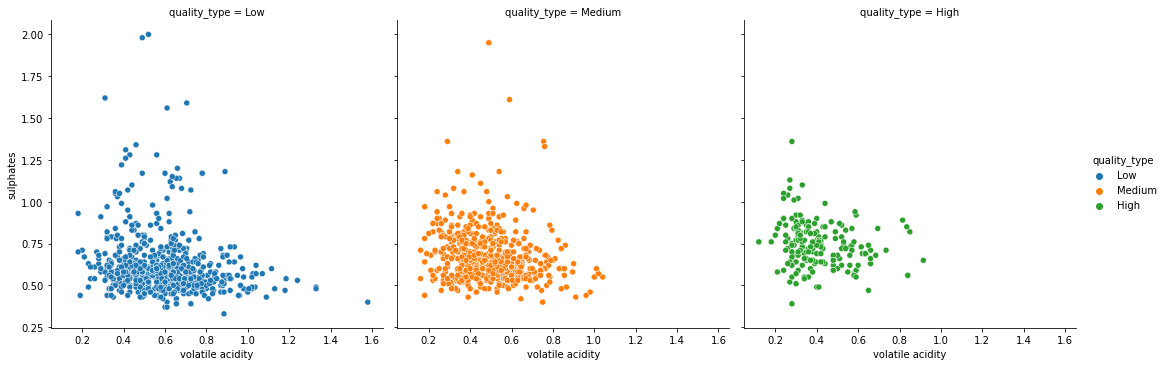

In [200]:
sb.relplot(x = "volatile acidity", y =  'sulphates', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

## Sulphates

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


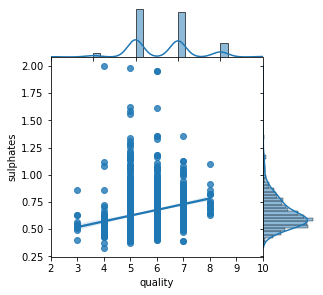

In [201]:
rj = sb.jointplot(x='quality', y='sulphates', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(2,11)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

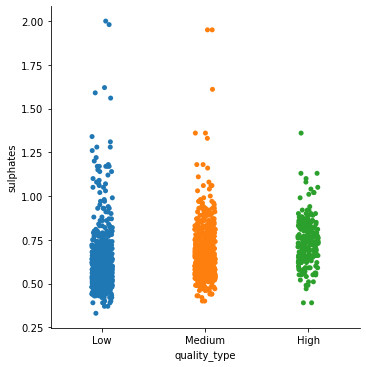

In [202]:
sb.catplot(x = 'quality_type', y = 'sulphates', data = RW_df, order = ["Low", "Medium", "High"])

In [203]:
rw_df_2  = RW_df.groupby('quality').mean()
rw_df_2   [["sulphates"]]

,sulphates
quality,
3,0.570000
4,0.596415
5,0.620969
6,0.675329
7,0.741256
8,0.767778


Text(0.5, 1.0, 'Sulphates Distribution in Different Quality')

<Figure size 864x576 with 0 Axes>

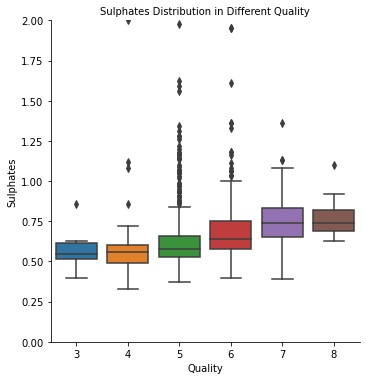

In [204]:
plt.figure(figsize = (12,8))
sb.catplot(x = "quality", y = "sulphates", kind="box", data= RW_df) 
plt.ylabel("Sulphates", size=10)
plt.xlabel("Quality", size=10)
plt.ylim(ymax = 2, ymin = 0)
plt.title("Sulphates Distribution in Different Quality", size=10)

#Text(0.5, 1.0, 'Alcohol Distribution in Different Quality')


Text(0.5, 1.0, 'Sulphates in Red Wine')

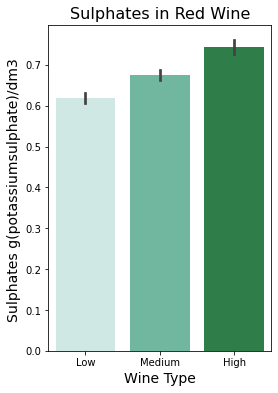

In [205]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "quality_type", y="sulphates", data=RW_df, palette= ("BuGn"))
plt.ylabel("Sulphates g(potassiumsulphate)/dm3 ", size=14)
plt.xlabel("Wine Type", size=14)
plt.title("Sulphates in Red Wine", size=16)
#sb.catplot(x="type", y="fixed acidity", kind="point", data=df_wines, hue="quality_type", palette= "Blues")
#plt.savefig("Total sulfur dioxide.png")  #to save the figure

### statistical tests- one way anova and t-test

In [206]:
x = data_Low["sulphates"].values.tolist()
#print (x)


In [207]:
y = data_Medium["sulphates"].values.tolist()
#print (y)

In [208]:
z = data_High["sulphates"].values.tolist()

In [209]:
from scipy.stats import f_oneway
stat, pval = f_oneway(x, y, z)
print(pval)

1.2777865916402993e-23


In [210]:
from scipy.stats import ttest_ind # 2 sample t test
tstat, pval = ttest_ind(x, y)
pval


5.350389136517734e-10

In [211]:
tstat, pval = ttest_ind(x, z)
pval

3.9625690081469716e-21

In [212]:
tstat, pval = ttest_ind(y, z)
pval

1.9129142915248575e-08

### sulphates- citric acid positive correlation 

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


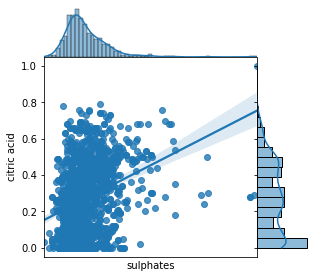

In [213]:
rj = sb.jointplot(x='sulphates', y='citric acid', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)


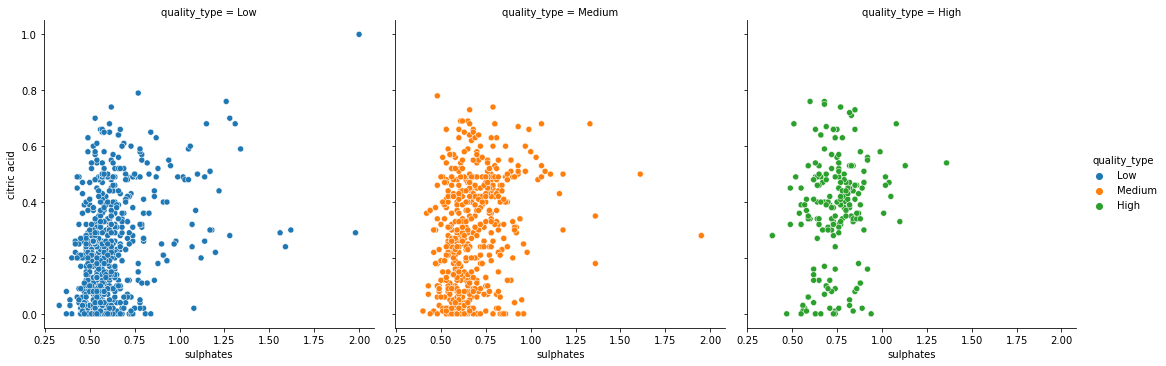

In [214]:
sb.relplot(x = "sulphates", y =  'citric acid', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

### sulphates- density positive correlation 

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


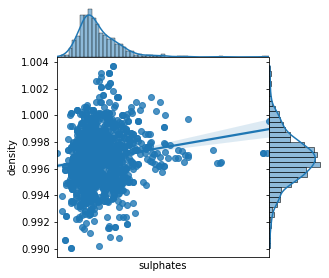

In [215]:
rj = sb.jointplot(x='sulphates', y='density', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

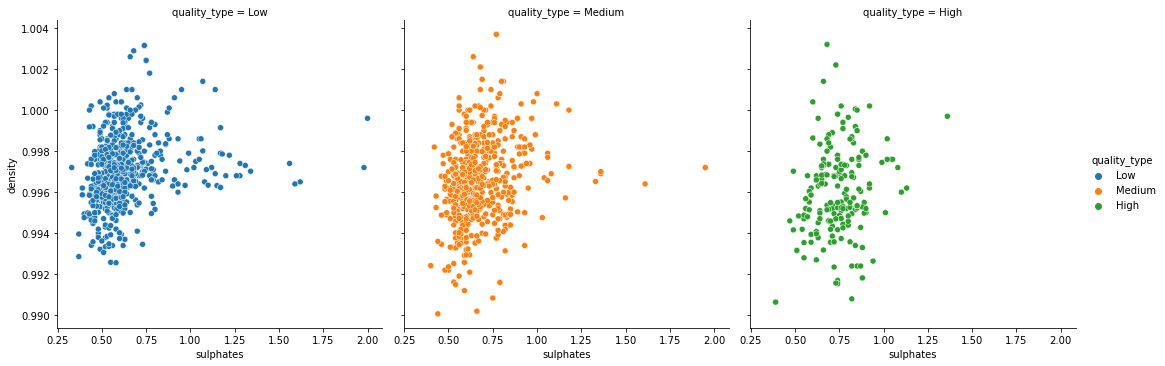

In [216]:
sb.relplot(x = "sulphates", y =  'density', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

### total sulfur dioxide

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


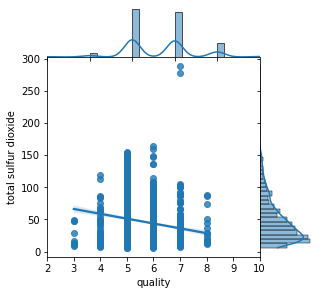

In [217]:
rj = sb.jointplot(x='quality', y='total sulfur dioxide', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(2,11)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)

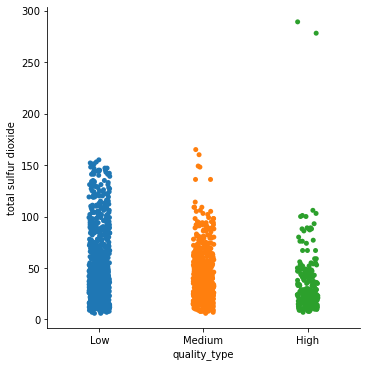

In [218]:
sb.catplot(x = 'quality_type', y = 'total sulfur dioxide', data = RW_df, order = ["Low", "Medium", "High"])

In [219]:
rw_df_2  = RW_df.groupby('quality').mean()
rw_df_2   [["total sulfur dioxide"]]

,total sulfur dioxide
quality,
3,24.900000
4,36.245283
5,56.513950
6,40.869906
7,35.020101
8,33.444444


Text(0.5, 1.0, 'total sulfur dioxide Distribution in Different Quality')

<Figure size 864x576 with 0 Axes>

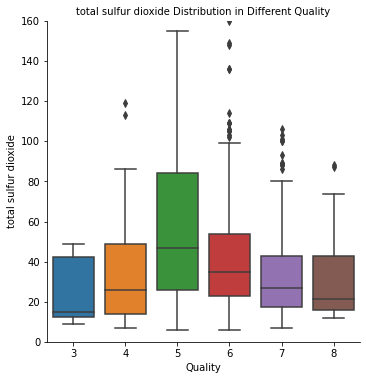

In [220]:
plt.figure(figsize = (12,8))
sb.catplot(x = "quality", y = "total sulfur dioxide", kind="box", data= RW_df) 
plt.ylabel("total sulfur dioxide", size=10)
plt.xlabel("Quality", size=10)
plt.ylim(ymax = 160, ymin = 0)
plt.title("total sulfur dioxide Distribution in Different Quality", size=10)

#Text(0.5, 1.0, 'Alcohol Distribution in Different Quality')

(0.0, 70.0)

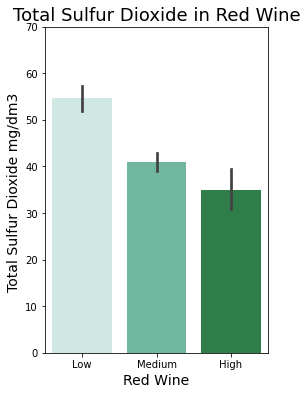

In [221]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "quality_type", y="total sulfur dioxide",data=RW_df,  palette= ("BuGn"))
plt.ylabel("Total Sulfur Dioxide mg/dm3 ", size=14)
plt.xlabel("Red Wine", size=14)
plt.title("Total Sulfur Dioxide in Red Wine", size=18)
plt.ylim(ymax = 70, ymin = 0)
#sb.catplot(x="type", y="fixed acidity", kind="point", data=df_wines, hue="quality_type", palette= "Blues")
#plt.savefig("fixed Acidity type.png")  #to save the figure

In [222]:
x = data_Low["total sulfur dioxide"].values.tolist()
#print (x)

In [223]:
y = data_Medium["total sulfur dioxide"].values.tolist()
#print (y)

In [224]:
z = data_High["total sulfur dioxide"].values.tolist()

In [225]:
from scipy.stats import f_oneway
stat, pval = f_oneway(x, y, z)
print(pval)

4.008433933639279e-21


In [226]:
from scipy.stats import ttest_ind # 2 sample t test
tstat, pval = ttest_ind(x, y)
pval


2.3843950737953545e-15

In [227]:
tstat, pval = ttest_ind(x, z)
pval

1.7551673794514872e-12

In [228]:
tstat, pval = ttest_ind(y, z)
pval

0.005168522532182324

#### total sulfur dioxide alcohol negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


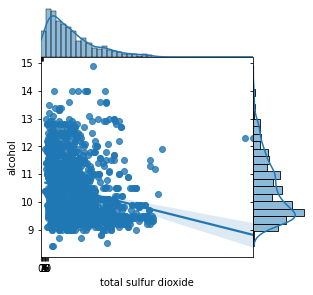

In [229]:
rj = sb.jointplot(x='total sulfur dioxide', y='alcohol', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,10)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

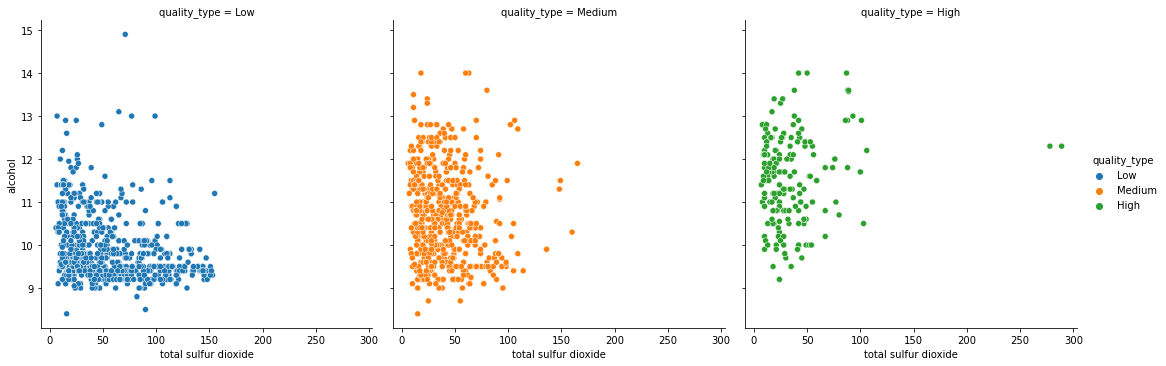

In [230]:
sb.relplot(x = "total sulfur dioxide", y =  'alcohol', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])


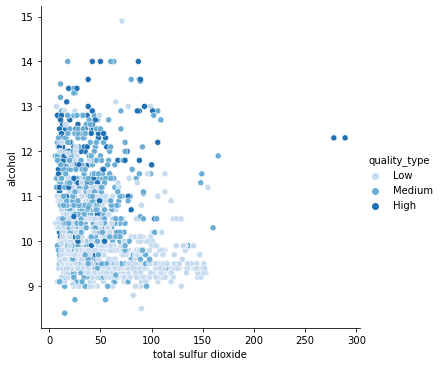

In [231]:
sb.relplot(x = "total sulfur dioxide", y =  'alcohol', data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"], palette= "Blues")


## density

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


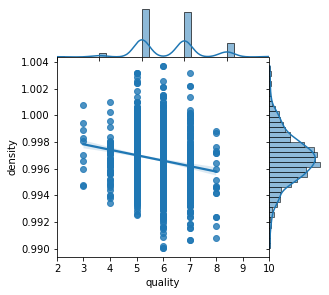

In [232]:
rj = sb.jointplot(x='quality', y='density', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(2,11)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Alcohol - Quality', fontsize=12)


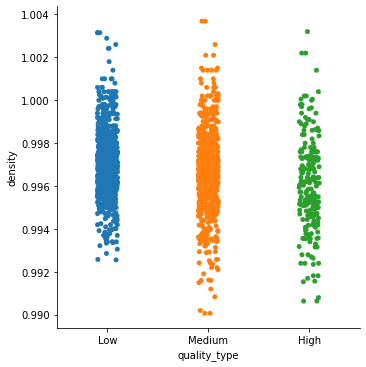

In [233]:
sb.catplot(x = 'quality_type', y = 'density', data = RW_df, order = ["Low", "Medium", "High"])

In [234]:
rw_df_2  = RW_df.groupby('quality').mean()
rw_df_2   [["density"]]

,density
quality,
3,0.997464
4,0.996542
5,0.997104
6,0.996615
7,0.996104
8,0.995212


Text(0.5, 1.0, 'density Distribution in Different Quality')

<Figure size 864x576 with 0 Axes>

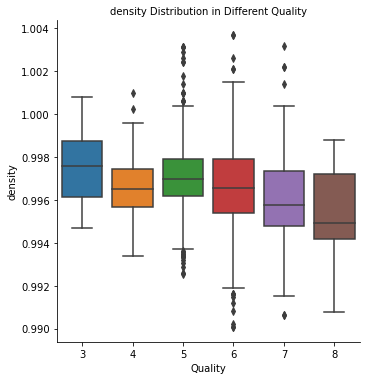

In [235]:
plt.figure(figsize = (12,8))
sb.catplot(x = "quality", y = "density", kind="box", data= RW_df) 
plt.ylabel("density", size=10)
plt.xlabel("Quality", size=10)
#plt.ylim(ymax = 2, ymin = 0)
plt.title("density Distribution in Different Quality", size=10)

#Text(0.5, 1.0, 'Alcohol Distribution in Different Quality')

Text(0.5, 1.0, 'Density in Red Wine')

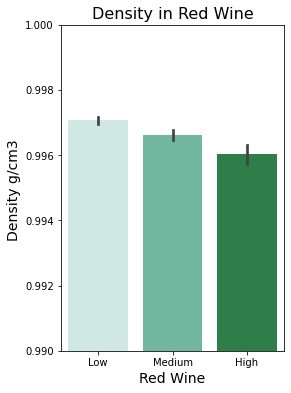

In [236]:
plt.figure(figsize=(4, 6))
sb.barplot(x= "quality_type", y="density", data=RW_df,palette= ("BuGn"
))
plt.ylabel("Density g/cm3 ", size=14)
plt.xlabel("Red Wine", size=14)
plt.ylim(ymax = 1, ymin = 0.990)
plt.title("Density in Red Wine", size=16)
#sb.catplot(x="type", y="fixed acidity", kind="point", data=df_wines, hue="quality_type", palette= "Blues")
#plt.savefig("Total sulfur dioxide.png")  #to save the figure

In [237]:
x = data_Low["density"].values.tolist()
#print (x)

In [238]:
y = data_Medium["density"].values.tolist()
#print (y)

In [239]:
z = data_High["density"].values.tolist()

In [240]:
from scipy.stats import f_oneway
stat, pval = f_oneway(x, y, z)
print(pval)

4.334251595448082e-13


In [241]:
from scipy.stats import ttest_ind # 2 sample t test
tstat, pval = ttest_ind(x, y)
pval

3.1245008671447158e-06

In [242]:
tstat, pval = ttest_ind(y, z)
pval

0.00030613435086790125

In [243]:
tstat, pval = ttest_ind(x, z)
pval

3.928812145555526e-14

#### density sulphates positive correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


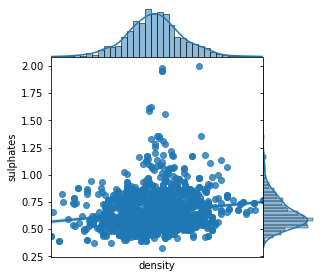

In [244]:
rj = sb.jointplot(x='density', y='sulphates', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

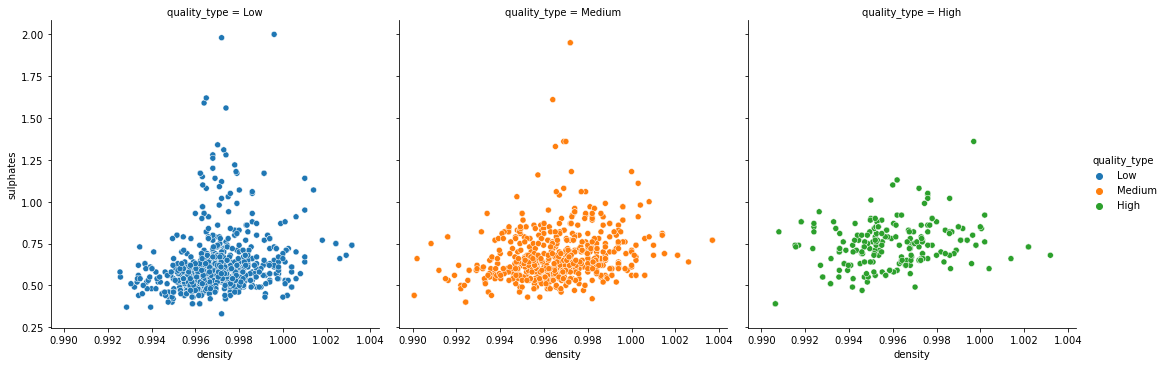

In [245]:
sb.relplot(x = "density", y =  'sulphates', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

#### density alcohol negative correlation

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


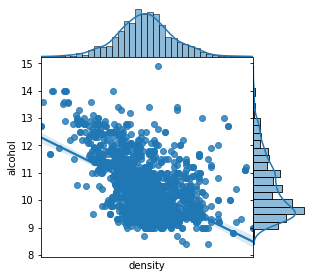

In [246]:
rj = sb.jointplot(x='density', y='alcohol', data=RW_df,
kind='reg', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(0,1)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
#t = fig.suptitle('Volatile Acidity - Quality', fontsize=12)

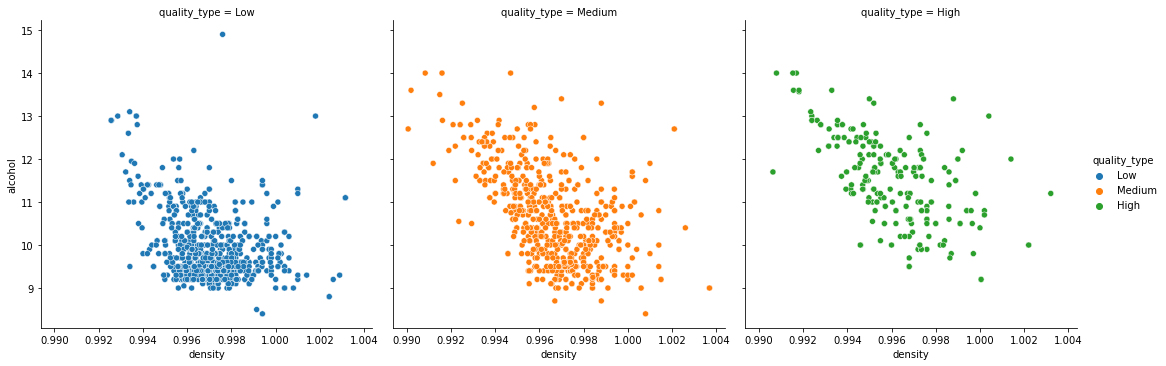

In [247]:
sb.relplot(x = "density", y =  'alcohol', col = 'quality_type', col_order = ["Low","Medium", "High"],data = RW_df, hue="quality_type",  hue_order= ["Low","Medium", "High"])

In [248]:
##### alcohol, volatile acidity, sulphates, total sulfur dioxide, density (x)

### Model performance

In [249]:
RW_df_sorted = RW_df.sort_values(by = "quality_type")
#df_wines_sorted


In [253]:
X =  RW_df_sorted.drop(['fixed acidity', "citric acid", "pH", "free sulfur dioxide", 'quality', "quality_type", "residual sugar", "chlorides"], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 828 to 1598
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   total sulfur dioxide  1599 non-null   float64
 2   density               1599 non-null   float64
 3   sulphates             1599 non-null   float64
 4   alcohol               1599 non-null   float64
dtypes: float64(5)
memory usage: 75.0 KB


In [254]:
#X =  RW_df_sorted.drop(['quality', 'type', "quality_type"], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 828 to 1598
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   total sulfur dioxide  1599 non-null   float64
 2   density               1599 non-null   float64
 3   sulphates             1599 non-null   float64
 4   alcohol               1599 non-null   float64
dtypes: float64(5)
memory usage: 75.0 KB


In [255]:
X.shape

(1599, 5)

In [256]:

le = LabelEncoder()
RW_df_sorted['quality_type'] = le.fit_transform(RW_df_sorted['quality_type'])
RW_df_sorted['quality_type'].value_counts()


NameError: name 'LabelEncoder' is not defined

In [ ]:
y = RW_df_sorted['quality_type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #random state here is to choose always the same numbers

In [ ]:
rus = RandomUnderSampler(random_state = 1)
X_train, y_train = rus.fit_sample(X_train, y_train)

In [ ]:
pd_y = pd.Series(y_train)
pd_y.value_counts()

2    175
1    175
0    175
Name: quality_type, dtype: int64

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
X_test

array([[-0.83606842, -1.51287943,  0.5266247 , ...,  1.31688451,
        -0.29073711,  0.35140482],
       [-0.7196398 , -1.39920642,  0.36974293, ...,  1.45074014,
         0.69664063,  1.49057735],
       [ 0.09536059, -0.14880338,  0.89268215, ..., -1.49408387,
        -1.27811485, -1.05065368],
       ...,
       [-0.95249705, -0.14880338, -1.14678081, ..., -0.02167187,
        -0.17457502, -0.96302502],
       [ 2.42393312, -0.60349539,  0.99726999, ..., -1.56101169,
         0.81280272, -0.34962443],
       [-0.37035392,  0.36272514, -0.57154766, ..., -0.75787787,
         1.4516942 , -1.05065368]])

In [ ]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

0.646875
[[ 33   0   9]
 [  8 112  30]
 [ 29  37  62]]


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.47      0.79      0.59        42
           1       0.75      0.75      0.75       150
           2       0.61      0.48      0.54       128

    accuracy                           0.65       320
   macro avg       0.61      0.67      0.63       320
weighted avg       0.66      0.65      0.65       320



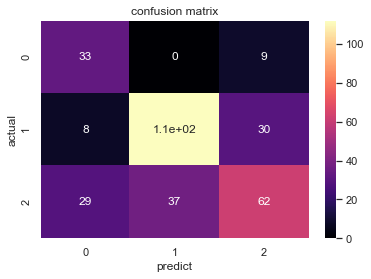

In [ ]:
sb.set()
fig = plt.figure()
ax = fig.add_subplot(111)
conf_mat = confusion_matrix(y_test, pred_rfc)
sb.heatmap(conf_mat,annot=True, cmap='magma') #cmap= magma,cividis
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('actual') 
plt.show()

### feature importance

Feature: 0, Score: 0.07359
Feature: 1, Score: 0.10772
Feature: 2, Score: 0.07404
Feature: 3, Score: 0.06678
Feature: 4, Score: 0.08018
Feature: 5, Score: 0.06647
Feature: 6, Score: 0.10099
Feature: 7, Score: 0.09341
Feature: 8, Score: 0.07095
Feature: 9, Score: 0.11777
Feature: 10, Score: 0.14809


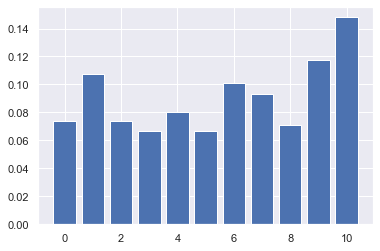

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64